# DataArray - Dfsu plotting

A DataArray with flexible mesh data, can be plotted in many different ways.

In [1]:
import matplotlib.pyplot as plt
import mikeio
%load_ext autoreload
%autoreload 2

## Dfsu 2d

In [2]:
fn = "../tests/testdata/oresundHD_run1.dfsu"
ds = mikeio.read(fn)
ds

<mikeio.Dataset>
Dimensions: (5, 3612)
Time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  U velocity <u velocity component> (meter per sec)
  3:  V velocity <v velocity component> (meter per sec)

In [3]:
da = ds["Surface elevation"]
da

<mikeio.DataArray>
Name: Surface elevation
Dimensions: (5, 3612)
Time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00

## Plot as map

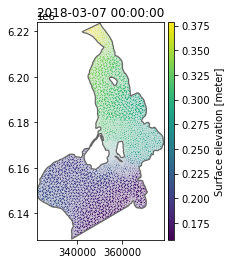

In [4]:
# default plot is a map, for multiple timestep data, the first timestep will be shown 
da.plot();

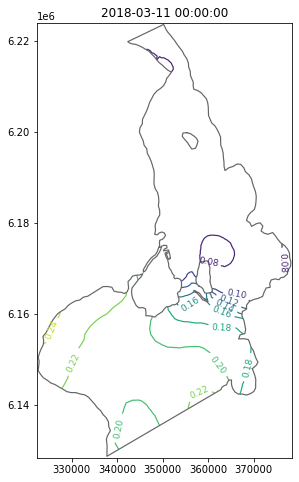

In [5]:
# plot last time step as contour map
da[-1].plot.contour(figsize=(5,8), show_mesh=False);

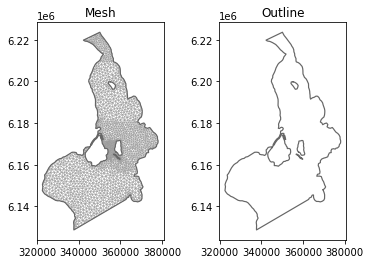

In [6]:
_, ax = plt.subplots(1,2)
da.plot.mesh(ax=ax[0]);
da.plot.outline(ax=ax[1]);

### Plot aggregated data

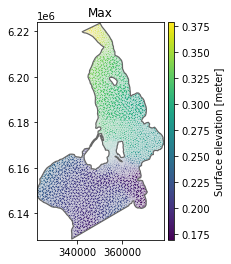

In [7]:
da.max().plot(title="Max");

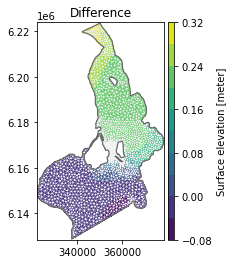

In [8]:
# difference between last and first timestep
(da[0] - da[-1]).plot.contourf(title="Difference");

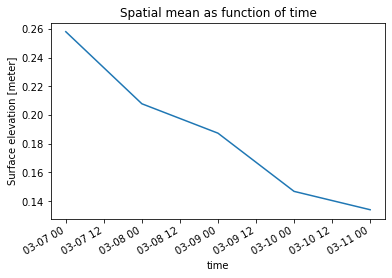

In [9]:
da.mean(axis="space").plot(title="Spatial mean as function of time");

## Other plots

* time series
* histogram

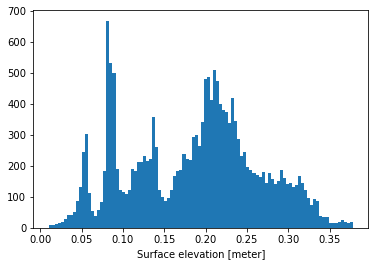

In [10]:
# plot all data as histogram
da.plot.hist(bins=100);

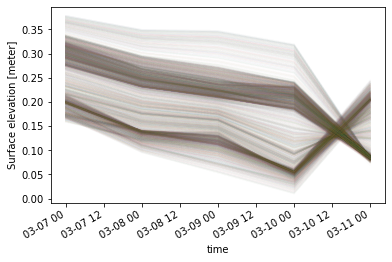

In [11]:
# plot all points as timeseries
da.plot.line(alpha=0.01);

## Dfsu 3d

In [12]:
fn = "../tests/testdata/oresund_sigma_z.dfsu"
dfs = mikeio.open(fn)
dfs

Dfsu3DSigmaZ
Number of elements: 17118
Number of nodes: 12042
Projection: UTM-33
Number of sigma layers: 4
Max number of z layers: 5
Items:
  0:  Z coordinate <ItemGeometry3D> (meter)
  1:  Temperature <Temperature> (degree Celsius)
  2:  Salinity <Salinity> (PSU)
Time: 3 steps with dt=10800.0s
      1997-09-15 21:00:00 -- 1997-09-16 03:00:00

### Read a specific layer
If only a specific layer is read, then all the standard 2d plotting can be used 

In [13]:
ds = dfs.read(elements=dfs.top_elements)
ds

c:\users\jem\source\mikeio\mikeio\spatial\FM_geometry.py:648: UserWarning: Warning: Only 1 layer in new geometry (hence 2d), but you have kept both top and bottom nodes! Hint: use node_layers='top' or 'bottom'
  warnings.warn(


<mikeio.Dataset>
Dimensions: (3, 3700)
Time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00
Items:
  0:  Z coordinate <ItemGeometry3D> (meter)
  1:  Temperature <Temperature> (degree Celsius)
  2:  Salinity <Salinity> (PSU)

In [14]:
ds.geometry.is_2d

True

In [15]:
#ds[1].plot() # fails - need fix

### Default plotting behaviour for 3d files is to plot surface layer 

In [16]:
ds = dfs.read() 
ds

<mikeio.Dataset>
Dimensions: (3, 17118)
Time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00
Items:
  0:  Z coordinate <ItemGeometry3D> (meter)
  1:  Temperature <Temperature> (degree Celsius)
  2:  Salinity <Salinity> (PSU)

In [17]:
ds.geometry.is_2d

False

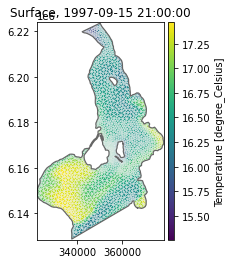

In [18]:
ds[1].plot();